In [1]:
#Below are the items that were imported by the code above so that you know what abbreviations to use in your code.

#Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

#AIDE imports
import aide_design
import aide_design.pipedatabase as pipe
from aide_design.units import unit_registry as u
from aide_design import physchem as pc
from aide_design import floc_model as floc
import aide_design.expert_inputs as exp
import aide_design.materials_database as mat
import aide_design.utility as ut
import aide_design.k_value_of_reductions_utility as k
import aide_design.pipeline_utility as pipeline

import warnings

# Practice Prelim 1
Note: this practice prelim does not add up to 100 points. This practice prelim is also longer than the actual prelim will be - this was done to give you an opportunity to review more questions while studying. Prelim 1 will be able to be completed in 1.5 to 2 hours.

### Multiple Choice (4 points each - 12 points)
Make your answer **bold** by typing `**` before and after the correct answer.

1. Which cause of head loss is used in the AguaClara rapid mix unit to produce local high energy dissipation?
    1. Major losses from wall shear 
    1. **Minor losses from a flow expansion**
<br>
<br>
1. Why is the settled water turbidity not a function of the initial turbidity according to the flocculation model?
    1. **The slowest part of flocculation is when the separation between primary particles (or small particles) is largest. The slow part of flocculation is the same for all suspensions. ** *See slide 55 in Flocculation Model *
    1. The settled water turbidity is only a function of the coagulant dose and that is not affected by the initial turbidity
<br>
<br>
1. A plant operator notices that when she is treating very turbid water and using a high coagulant dose that the constant head tank in the chemical dose controller begins to empty. What might be causing this problem?
    1. The LFOM must be designed for higher head loss
    1. **Float valve orifice is too small** * See slide 73 in Flow Control and Measurement *
    1. Constant head tank is not big enough
    1. The coagulant dose is too high


***

### Short Answer (5 points each)
1. What are the three constraints that dictate the inner diameter of the dosing tubes for coagulant and chlorine? Why is each constraint important?  
    * *See slide 79 in Flow Control and Measurement *
   
    1) **Laminar** - this constraint is important because it allows us to use the Hagen-Poiseuille equation (for major losses), in which flow is leaner with headloss.    
    2) **Error** - for minor losses, flow is never linear with the head loss. We want to make our minor losses as small as possible because want our equation to have a linear relationship between flow and headloss.  
    3) **Discrete pipe sizes** - we need to design for pipes that are commercially available!
    


***

## Design Challenges (72 points)
Assign the given inputs to variables. Write the equation in python using variables.

### 1) Dose controller lever arm and float analysis (22 points)

An AguaClara dose controller has a slider (including the hanging drop tube) with a total mass of 150 grams. The slider's center of mass is at 50 cm from the lever pivot point when the slider is set for the maximum dose. The float for the lever arm has a diameter of 6 inches. The float is attached to the lever arm 50 cm from the pivot point. The lever arm was set to be level when there was zero flow through the entrance tank and the slider was at the maximum dose position. If the slider is now moved so that its center of mass is 25 cm from the lever's pivot point, answer A through E. 

State any assumptions that you make.

![](Lever arm figure.png)

![](Lever_arm_figure.png)

In [2]:
# define your parameters and variables given in the problem statement here

# Slides 58-62 in Flow Control and Measurement in addition to recalling physics: mechanics 
# will be helpful in understanding this problem

d_float = 6*u.inch
x_slider_initial = 50*u.cm
x_float = 50*u.cm
x_slider_final = 25*u.cm
area_float = pc.area_circle(d_float)
mass_slider = 150*u.gram
force_slider = mass_slider*pc.gravity

#assume water is at 20 C to calculate the density
T_water = 20*u.degC

**A. (2 points) **  
Because the slider has mass, moving its location affects the equilibrium position of the lever arm. After moving the slider closer to the pivot point, is the slider's elevation higher or lower than it was before it moved?

In [3]:
print('A. The slider is higher in elevation than desired.')

A. The slider is higher in elevation than desired.


**B. (5 points)**  
What is the change in force acting on the float caused by moving the slider? 

In [4]:
#First find change in force on the float end of the lever
delta_force = force_slider * (x_slider_initial - x_slider_final) / x_float
print('B. The change in force acting on the float is',delta_force.to(u.N))

B. The change in force acting on the float is 0.7355 newton


**C. (5 points)** 
What is the change in the float elevation?

In [5]:
delta_volume = delta_force / (pc.density_water(T_water)*pc.gravity)
print('The change in volume submerged is',delta_volume.to(u.mL))

delta_h_float = delta_volume / area_float
print('C. The change in float elevation is',delta_h_float.to(u.mm))

The change in volume submerged is 75.14 milliliter
C. The change in float elevation is 4.119 millimeter


**D. (5 points)** 
What is the change in the slider elevation?

In [6]:
delta_h_slider = delta_h_float * x_slider_final / x_float
print('D. The change in slider elevation is',delta_h_slider.to(u.mm))

D. The change in slider elevation is 2.059 millimeter


**E. (5 points)**  
How could you reduce this undesirable change in slider elevation?

In [7]:
print('E. The change in elevation could be reduced by increasing the diameter of the float.')

E. The change in elevation could be reduced by increasing the diameter of the float.


### 2) Plot floc terminal velocity as a function of floc size (10 points)
Create a plot of floc terminal velocity as a function of floc size. Vary floc size from the diameter of clay to 1 mm. The initial concentration of clay is 100 NTU. Temperature is 20 degrees Celsius. You can either ignore the influence of the coagulant dose or you can set the coagulant dose to 2 mg/L as aluminum.

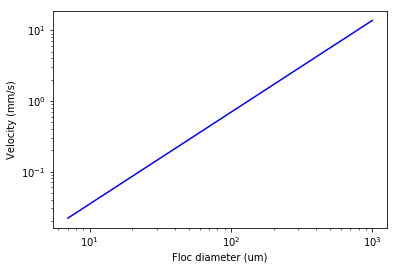

In [8]:
# Slides 34 in Flocculation Model will be helpful in understanding this problem

conc_Al = 2*u.mg/u.L
ConcClay = 100*u.NTU
DiamClay = 7*u.um
coag = floc.PACl
material = floc.Clay
DiamFractal = floc.DIAM_FRACTAL
DiamTarget = np.linspace(DiamClay.to(u.mm),1*u.mm)*u.mm
Temp = 20*u.degC

# Note: you can use the function predefined in the floc file, floc.vel_term_floc. 
# Or, you can write your own function using equations on lecture slides.
VTerminal = floc.vel_term_floc(conc_Al, ConcClay, coag, material, DiamFractal, DiamTarget, Temp)

# Plot 
plt.plot(DiamTarget.to(u.um), VTerminal.to(u.mm/u.s), 'b-')
plt.xlabel('Floc diameter (um)')
plt.ylabel('Velocity (mm/s)')
plt.yscale('log')
plt.xscale('log')
plt.show()

### 3) Rapid mix (30 points)
A rapid mix orifice is installed in the bottom of the LFOM pipe that delivers water to the rapid mix chamber and then to the flocculator. The plant flow rate is 20 L/s. The nominal diameter of the LFOM is 6 inches and it is SDR 26. The inner diameter of the rapid mix orifice is 10 cm. The vena contracta coefficient for the orifice is 0.7. The **rectangular** chamber beneath the rapid mix pipe is 2 m deep, and the velocity of the water in this chamber is 20 cm/s. The water temperature is 20 °C.

![](rapidMixDiagram.png)

In [9]:
# define your parameters and variables given in the problem statement here

ND_lfom = 6*u.inch
SDR_lfom = 26
d_rapid_mix_orifice = 10*u.cm
flow_plant = 20*u.L/u.s
pi_vena_contracta = 0.7
ID_lfom = pipe.ID_SDR(ND_lfom,SDR_lfom)
area_rapid_mix_orifice = pc.area_circle(d_rapid_mix_orifice)
area_vena_contracta = area_rapid_mix_orifice*pi_vena_contracta
vel_vena_contracta = flow_plant/area_vena_contracta
vel_rapid_mix_chamber = 0.2*u.m/u.s
h_rapid_mix_chamber = 2*u.m
temp_water = 20*u.degC

**A. (5 points)**  
Estimate the head loss that occurs in the flow expansion as the water leaves the orifice and enters the rapid mix chamber below the orifice. 

In [10]:
#See Slide 14 in Flow Control and Measurement

hl_rapid_mix = ((vel_vena_contracta-vel_rapid_mix_chamber)**2)/(2*pc.gravity)
print('A. The head loss from the rapid mix is',hl_rapid_mix.to(u.cm))

A. The head loss from the rapid mix is 60.26 centimeter


**B. (5 points)**   
What is the minor loss coefficient for this orifice if you use the average velocity in the pipe as the reference velocity?

In [11]:
# See Slide 15 in Flow Control and Measurement

area_lfom = pc.area_circle(ID_lfom)
vel_lfom = flow_plant/area_lfom
K_rapid_mix = hl_rapid_mix/((vel_lfom**2)/(2*pc.gravity))
print('B. The minor loss coefficient of the rapid mix orifice is',K_rapid_mix)

B. The minor loss coefficient of the rapid mix orifice is 10.61 dimensionless


**C. (5 points)**    
What is the maximum energy dissipation rate in the jet formed by the rapid mix orifice?

In [12]:
# pi_round_jet can be found in Rapid Mix, slide 36 

pi_round_jet = 0.5
d_vena_contracta = pc.diam_circle(area_vena_contracta)
EDR_centerline = ((pi_round_jet*vel_vena_contracta)**3)/d_vena_contracta
print('C. The maximum energy dissipation rate in the rapid mix jet is',EDR_centerline.to(u.W/u.kg))

C. The maximum energy dissipation rate in the rapid mix jet is 71.93 watt / kilogram


**D. (5 points)**    
What is the Kolmogorov length scale at the maximum energy dissipation rate?

In [13]:
#See Slide 51 in Rapid Mix

l_Kolmogorov = ((pc.viscosity_kinematic(temp_water)**3)/EDR_centerline)**0.25
print('D. The minimum Kolmogorov length scale in the rapid mix jet is',l_Kolmogorov.to(u.um))

D. The minimum Kolmogorov length scale in the rapid mix jet is 10.89 micrometer


**E. (5 points)**    
What is the average energy dissipation rate in the rapid mix chamber that the rapid mix jet discharges into?

In [14]:
#See Slide 20 in Rapid Mix

time_rapid_mix = h_rapid_mix_chamber/vel_rapid_mix_chamber
EDR_average = pc.gravity*hl_rapid_mix/(time_rapid_mix)
print('E. The average energy dissipation rate in the rapid mix chamber is',EDR_average.to(u.W/u.kg))

E. The average energy dissipation rate in the rapid mix chamber is 0.5909 watt / kilogram


**F. (5 points)**    
What is the average velocity gradient (G) in the rapid mix chamber that the rapid mix jet discharges into?

In [15]:
#See Slide 8 in Flocculation Model

G_average = np.sqrt(EDR_average/pc.viscosity_kinematic(temp_water))
print('F. The average velocity gradient in the rapid mix chamber is',G_average.to(u.Hz))

F. The average velocity gradient in the rapid mix chamber is 767.4 hertz


### 4) Maximum plant flow using a single dosing tube (10 points)
The coagulant stock concentration is 70 g/L of aluminum and the maximum coagulant dose is expected to be 10 mg/L as aluminum. The maximum error due to nonlinearity is set to 0.1. The head loss for the CDC dosing tubes is 20 cm. The sum of the minor losses for the CDC dosing tube system was measured to be 3.


In [16]:
# define your parameters and variables given in the problem statement here

Pi_non_linear_error = 0.1
d_CDC_tube = 1/8*u.inch
hl_CDC = 20*u.cm
K_CDC = 3
C_max_plant = 10*u.mg/u.L
C_stock = 70*u.g/u.L

**A. (5 points)**   
What is the maximum coagulant flow rate for a single dosing tube with a 1/8 inch inner diameter? 

In [17]:
#See slide 77 in Flow Control and Measurement

flow_max_CDC = np.pi*(d_CDC_tube**2)/4*np.sqrt(2*pc.gravity*hl_CDC*Pi_non_linear_error/K_CDC)
print('The maximum chemical flow is',flow_max_CDC.to(u.mL/u.s))

The maximum chemical flow is 2.863 milliliter / second


**B. (5 points)**  
What is the maximum plant flow rate that can be served by a single dosing tube with a 1/8 inch inner diameter? 

In [18]:
flow_max_plant = flow_max_CDC*C_stock/C_max_plant
print('The maximum plant flow rate is',flow_max_plant.to(u.L/u.s))

The maximum plant flow rate is 20.04 liter / second
